In [1]:
import scipy.io as sio
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np


test = sio.loadmat('ex7data2.mat')

In [2]:
data=pd.DataFrame(test['X'])
data.columns=['F1', 'F2']
initial_centroids=np.array([[3.0,3.0],[6.0,2.0],[8.0,5.0]])
data.head()

,F1,F2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


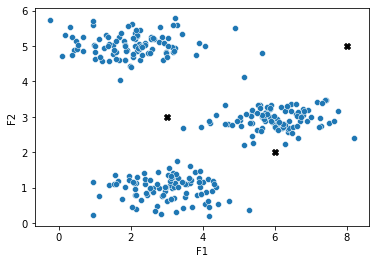

In [3]:
sns.scatterplot(x=data['F1'], y=data['F2'])
plt.scatter(x=initial_centroids[:,0], y=initial_centroids[:,1], color='k', marker='X')

In [4]:
def eucladian_dist(first, second):
    dist=((first[0]-second[0])**2 + (first[1]-second[1])**2)**0.5
    return dist

In [5]:
def findClosestCentroids(x, centroids):
    idx=[] #here clusters
    for i in range(len(x)):
        dist=[] #here distan
        for j in range(len(centroids)):
            dist.append(eucladian_dist(x.iloc[i,:2], centroids[j])) # calculated by eucladian dist
        idx.append(dist.index(min(dist))) # append to idx index of min dist
    return idx

In [6]:
def computeCentroids(X, idx, centroids):  
    copy_X=X.copy()
    copy_X['clustering']=pd.Series(idx)   # | F1 |  F2  | clustering | 3 columns
    old_centroids=centroids.copy()
    
    for i in range(len(centroids)):
        centroids[i][0]=copy_X[copy_X['clustering']==i].iloc[:, 0].mean()
        centroids[i][1]=copy_X[copy_X['clustering']==i].iloc[:, 1].mean()
    return old_centroids, centroids

1
2
3
4
5
6
7


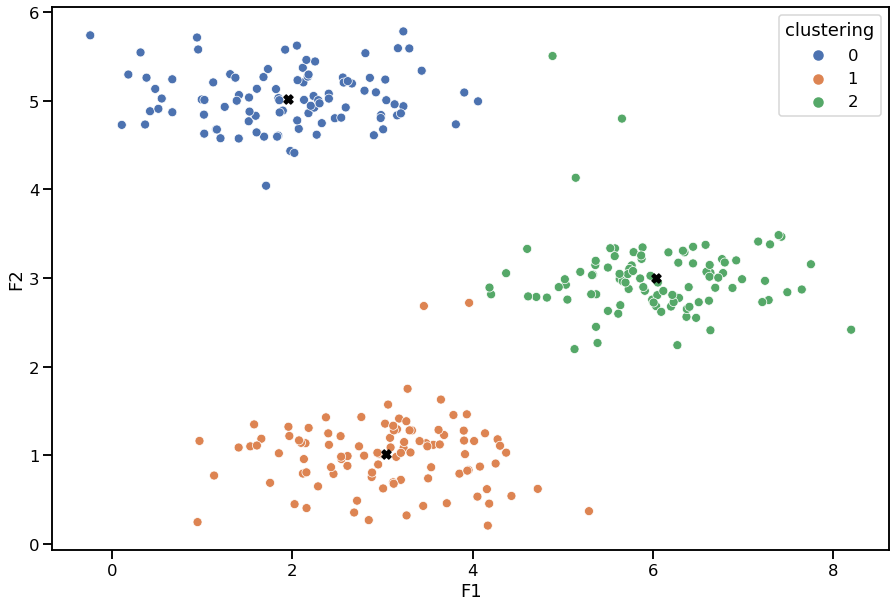

In [7]:
i=1
while True:
    
    idx = findClosestCentroids(data, initial_centroids)
    old_centroids, initial_centroids = computeCentroids(data, idx, initial_centroids)
    print(i)
    i+=1
    if (old_centroids==initial_centroids).sum(axis=1).sum(axis=0)==initial_centroids.size:
        
        b=pd.Series(idx)
        data['clustering']=b
        
        plt.rcParams['figure.figsize']=(15,10)
        sns.set_context('talk')
        
        sns.scatterplot(x=data['F1'], y=data['F2'], hue=data['clustering'], palette='deep')
        plt.scatter(x=initial_centroids[:,0], y=initial_centroids[:,1], color='k', marker='X')
        break
       